In [1]:
import pandas as pd
import numpy as np

## SHOOTINGS IN NEW YORK

In [2]:
shoot = pd.read_csv('../data/NYPD_Shooting_Incident_Data__Historic_.csv')

In [3]:
shoot.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [4]:
shoot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   LOC_OF_OCCUR_DESC        1716 non-null   object 
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27310 non-null  float64
 7   LOC_CLASSFCTN_DESC       1716 non-null   object 
 8   LOCATION_DESC            12335 non-null  object 
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           17968 non-null  object 
 11  PERP_SEX                 18002 non-null  object 
 12  PERP_RACE                18002 non-null  object 
 13  VIC_AGE_GROUP            27312 non-null  object 
 14  VIC_SEX               

In [5]:
shoot.drop('LOC_OF_OCCUR_DESC', axis=1, inplace=True)
shoot.drop('LOC_CLASSFCTN_DESC', axis=1, inplace=True)
shoot.drop('X_COORD_CD', axis=1, inplace=True)
shoot.drop('Y_COORD_CD', axis=1, inplace=True)
shoot.drop('PERP_RACE', axis=1, inplace=True)
shoot.drop('VIC_RACE', axis=1, inplace=True)
shoot.drop('JURISDICTION_CODE', axis=1, inplace=True)



In [6]:
shoot['LOCATION_DESC'] = shoot['LOCATION_DESC'].fillna('Unknown')

In [7]:
shoot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   PRECINCT                 27312 non-null  int64  
 5   LOCATION_DESC            27312 non-null  object 
 6   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 7   PERP_AGE_GROUP           17968 non-null  object 
 8   PERP_SEX                 18002 non-null  object 
 9   VIC_AGE_GROUP            27312 non-null  object 
 10  VIC_SEX                  27312 non-null  object 
 11  Latitude                 27302 non-null  float64
 12  Longitude                27302 non-null  float64
 13  Lon_Lat                  27302 non-null  object 
dtypes: bool(1), float64(2)

In [8]:
shoot.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,VIC_AGE_GROUP,VIC_SEX,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,105,Unknown,False,NaN,NaN,18-24,M,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,40,Unknown,False,NaN,NaN,18-24,M,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,108,Unknown,True,NaN,NaN,25-44,M,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,44,Unknown,False,NaN,NaN,<18,M,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,47,Unknown,True,25-44,M,45-64,M,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [9]:
shoot = shoot.dropna(subset='Latitude')

In [10]:
shoot['PERP_AGE_GROUP'] = shoot['PERP_AGE_GROUP'].fillna('Unknown')
shoot['PERP_SEX'] = shoot['PERP_SEX'].fillna('Unknown')

In [11]:
shoot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27302 entries, 0 to 27311
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27302 non-null  int64  
 1   OCCUR_DATE               27302 non-null  object 
 2   OCCUR_TIME               27302 non-null  object 
 3   BORO                     27302 non-null  object 
 4   PRECINCT                 27302 non-null  int64  
 5   LOCATION_DESC            27302 non-null  object 
 6   STATISTICAL_MURDER_FLAG  27302 non-null  bool   
 7   PERP_AGE_GROUP           27302 non-null  object 
 8   PERP_SEX                 27302 non-null  object 
 9   VIC_AGE_GROUP            27302 non-null  object 
 10  VIC_SEX                  27302 non-null  object 
 11  Latitude                 27302 non-null  float64
 12  Longitude                27302 non-null  float64
 13  Lon_Lat                  27302 non-null  object 
dtypes: bool(1), float64(2)

https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8

Sacar columna Year

In [12]:
shoot['Year'] = shoot.OCCUR_DATE.str[6:] 

In [13]:
shoot.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,VIC_AGE_GROUP,VIC_SEX,Latitude,Longitude,Lon_Lat,Year
0,228798151,05/27/2021,21:30:00,QUEENS,105,Unknown,False,Unknown,Unknown,18-24,M,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025),2021
1,137471050,06/27/2014,17:40:00,BRONX,40,Unknown,False,Unknown,Unknown,18-24,M,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006),2014
2,147998800,11/21/2015,03:56:00,QUEENS,108,Unknown,True,Unknown,Unknown,25-44,M,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004),2015
3,146837977,10/09/2015,18:30:00,BRONX,44,Unknown,False,Unknown,Unknown,<18,M,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003),2015
4,58921844,02/19/2009,22:58:00,BRONX,47,Unknown,True,25-44,M,45-64,M,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006),2009


In [14]:
shoot.Year.sort_values().unique()

array(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'], dtype=object)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

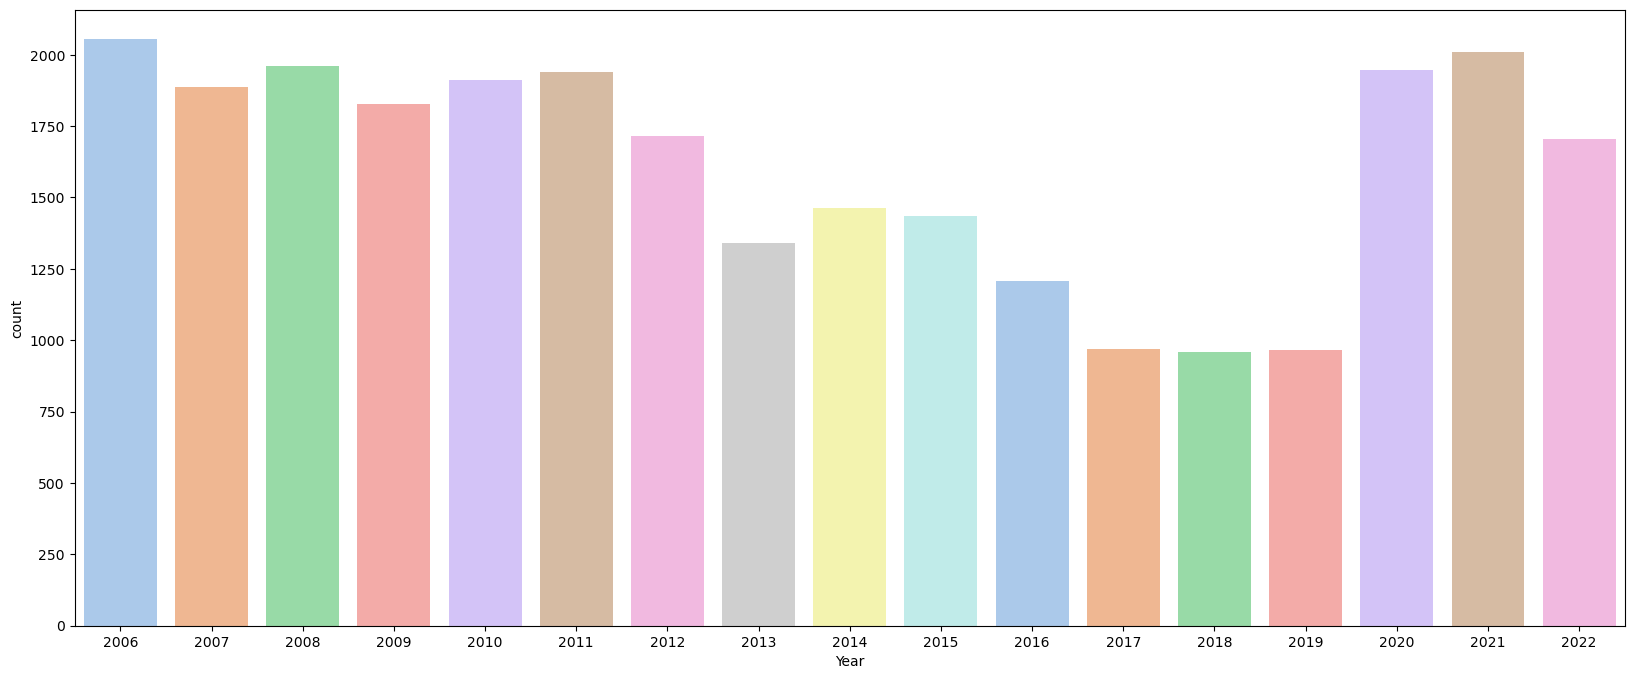

In [16]:
f, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x="Year", data=shoot, palette="pastel", order=shoot["Year"].value_counts().index.sort_values()); 


## unemployement POR BOROUGH

In [17]:

dfs = pd.read_excel(r'C:\Users\river\Ironhack-data\Proyectos\ETL\data\revised-2022-borough-labor-force.xlsx', sheet_name=None)


https://dol.ny.gov/labor-statistics-new-york-city-region

In [18]:
dfs;

In [19]:
bronx = dfs["Bronx"]
brooklyn = dfs["Brooklyn"]
manhattan = dfs["Manhattan"]
staten_island = dfs["Staten Island"]
queens = dfs["Queens"]

In [20]:
    
def arreglo (df):
    df = df.rename(columns={"Revised 2022 Labor Force Data ": "Area", "Revised 2022 Labor Force Data": "Area" ,"Unnamed: 1": "Year", "Unnamed: 2": "Month", "Unnamed: 3": "Labor Force", "Unnamed: 4": "Employed", "Unnamed: 5":"Unemployed" ,"Unnamed: 6": "Unemployment Rate %"})
    df = df.drop(df.index[0:2])
    df = df.iloc[:-1]

    return df


In [21]:
bronx = arreglo(bronx)
manhattan = arreglo(manhattan)
queens = arreglo(queens)
staten_island = arreglo(staten_island)
brooklyn = arreglo(brooklyn)



In [22]:
bronx['Area'] = bronx['Area'].str.split().str[0]
manhattan['Area'] = manhattan['Area'].replace('New York County', 'Manhattan')
queens['Area'] = queens['Area'].str.split().str[0]
staten_island['Area'] = staten_island['Area'].replace('Richmond County', 'Staten Island')
brooklyn['Area'] = brooklyn['Area'].replace('Kings County', 'Brooklyn')

Juntos los cinco dfs 

In [23]:
employment = pd.concat([brooklyn, manhattan, bronx, staten_island, queens], ignore_index=True)
employment.head()

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate %
0,Brooklyn,2022,1,1213800,1116100,97700,8
1,Brooklyn,2022,2,1216900,1127500,89300,7.3
2,Brooklyn,2022,3,1214800,1136400,78400,6.5
3,Brooklyn,2022,4,1200300,1129800,70500,5.9
4,Brooklyn,2022,5,1201800,1134900,66900,5.6


In [ ]:
employment.to_csv('employment.csv', index=False)